In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
with open('crime_data.csv') as f:
    print(f)

<_io.TextIOWrapper name='crime_data.csv' mode='r' encoding='cp1252'>


In [3]:
data = pd.read_csv('crime_data.csv',encoding='cp1252')

In [4]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [6]:
data.rename(columns = {'Unnamed: 0':'Places'}, inplace = True)
data

,Places,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [7]:
data['Places'].nunique()

50

In [8]:
from sklearn.preprocessing import OneHotEncoder

In [9]:
data = pd.get_dummies(data, columns = ['Places'])
print(data)

    Murder  Assault  UrbanPop  Rape  Places_Alabama  Places_Alaska  \
0     13.2      236        58  21.2               1              0   
1     10.0      263        48  44.5               0              1   
2      8.1      294        80  31.0               0              0   
3      8.8      190        50  19.5               0              0   
4      9.0      276        91  40.6               0              0   
5      7.9      204        78  38.7               0              0   
6      3.3      110        77  11.1               0              0   
7      5.9      238        72  15.8               0              0   
8     15.4      335        80  31.9               0              0   
9     17.4      211        60  25.8               0              0   
10     5.3       46        83  20.2               0              0   
11     2.6      120        54  14.2               0              0   
12    10.4      249        83  24.0               0              0   
13     7.2      113 

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 54 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Murder                 50 non-null     float64
 1   Assault                50 non-null     int64  
 2   UrbanPop               50 non-null     int64  
 3   Rape                   50 non-null     float64
 4   Places_Alabama         50 non-null     uint8  
 5   Places_Alaska          50 non-null     uint8  
 6   Places_Arizona         50 non-null     uint8  
 7   Places_Arkansas        50 non-null     uint8  
 8   Places_California      50 non-null     uint8  
 9   Places_Colorado        50 non-null     uint8  
 10  Places_Connecticut     50 non-null     uint8  
 11  Places_Delaware        50 non-null     uint8  
 12  Places_Florida         50 non-null     uint8  
 13  Places_Georgia         50 non-null     uint8  
 14  Places_Hawaii          50 non-null     uint8  
 15  Places_I

In [11]:
sns.pairplot(data)

In [12]:
from sklearn.cluster import KMeans
# Standardisation function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.iloc[:,1:])
scaled_data

array([[ 7.90787158e-01, -5.26195142e-01, -3.45115891e-03, ...,
        -1.42857143e-01, -1.42857143e-01, -1.42857143e-01],
       [ 1.11805959e+00, -1.22406668e+00,  2.50942392e+00, ...,
        -1.42857143e-01, -1.42857143e-01, -1.42857143e-01],
       [ 1.49381682e+00,  1.00912225e+00,  1.05346626e+00, ...,
        -1.42857143e-01, -1.42857143e-01, -1.42857143e-01],
       ...,
       [-1.08799901e+00, -1.85215107e+00, -1.28685088e+00, ...,
         7.00000000e+00, -1.42857143e-01, -1.42857143e-01],
       [-1.42739264e+00,  3.21020909e-02, -1.12507780e+00, ...,
        -1.42857143e-01,  7.00000000e+00, -1.42857143e-01],
       [-1.18302923e-01, -3.86620834e-01, -6.07403968e-01, ...,
        -1.42857143e-01, -1.42857143e-01,  7.00000000e+00]])

In [13]:
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=3).fit(data)

C:\Users\shlok\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shlok\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shlok\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shlok\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

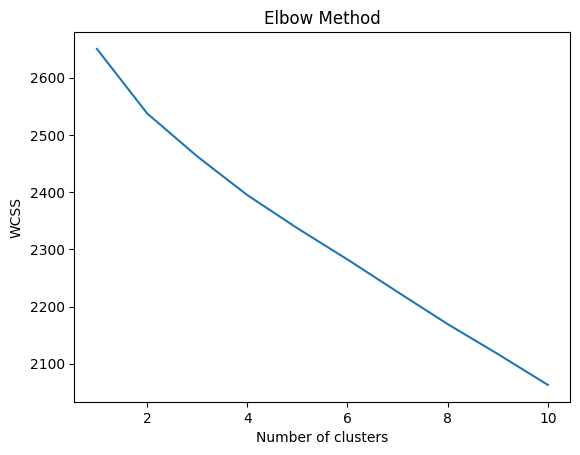

In [14]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
from sklearn.metrics import silhouette_score

In [16]:
kmeans = KMeans(n_clusters=3)
predict=kmeans.fit_predict(scaled_data)

C:\Users\shlok\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [17]:
predict

array([1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 2, 1, 0, 2, 0, 2, 1, 2, 1, 0, 1,
       0, 1, 1, 2, 0, 1, 2, 0, 1, 1, 1, 2, 0, 0, 1, 0, 0, 1, 2, 1, 1, 0,
       2, 0, 0, 2, 0, 0])

In [18]:
#Build Cluster algorithm
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(scaled_data)

C:\Users\shlok\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [19]:
clusters_new.labels_

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 2, 1, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 1, 1])

In [20]:
data['clusterid_new'] = clusters_new.labels_

In [21]:
data

,Murder,Assault,UrbanPop,Rape,Places_Alabama,Places_Alaska,Places_Arizona,Places_Arkansas,Places_California,Places_Colorado,...,Places_Tennessee,Places_Texas,Places_Utah,Places_Vermont,Places_Virginia,Places_Washington,Places_West Virginia,Places_Wisconsin,Places_Wyoming,clusterid_new
0,13.2,236,58,21.2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10.0,263,48,44.5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8.1,294,80,31.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8.8,190,50,19.5,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.0,276,91,40.6,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,7.9,204,78,38.7,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,3.3,110,77,11.1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,5.9,238,72,15.8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,15.4,335,80,31.9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,17.4,211,60,25.8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
data

,Murder,Assault,UrbanPop,Rape,Places_Alabama,Places_Alaska,Places_Arizona,Places_Arkansas,Places_California,Places_Colorado,...,Places_Tennessee,Places_Texas,Places_Utah,Places_Vermont,Places_Virginia,Places_Washington,Places_West Virginia,Places_Wisconsin,Places_Wyoming,clusterid_new
0,13.2,236,58,21.2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10.0,263,48,44.5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8.1,294,80,31.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8.8,190,50,19.5,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.0,276,91,40.6,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,7.9,204,78,38.7,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,3.3,110,77,11.1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,5.9,238,72,15.8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,15.4,335,80,31.9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,17.4,211,60,25.8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#these are standardized values.
clusters_new.cluster_centers_

array([[ 0.97866578,  0.15264354,  0.74266587,  0.18181818,  0.18181818,
         0.18181818,  0.18181818,  0.18181818,  0.18181818, -0.14285714,
         0.18181818,  0.18181818,  0.18181818, -0.14285714, -0.14285714,
         0.18181818, -0.14285714, -0.14285714, -0.14285714, -0.14285714,
         0.18181818, -0.14285714,  0.18181818, -0.14285714,  0.18181818,
        -0.14285714,  0.18181818,  0.18181818, -0.14285714, -0.14285714,
         0.18181818, -0.14285714, -0.14285714,  0.18181818,  0.18181818,
         0.18181818, -0.14285714, -0.14285714, -0.14285714, -0.14285714,
        -0.14285714, -0.14285714,  0.18181818, -0.14285714,  0.18181818,
         0.18181818, -0.14285714, -0.14285714, -0.14285714, -0.14285714,
        -0.14285714, -0.14285714, -0.14285714],
       [-0.58092876,  0.48184153, -0.33119142, -0.14285714, -0.14285714,
        -0.14285714, -0.14285714, -0.14285714, -0.14285714,  0.25396825,
        -0.14285714, -0.14285714, -0.14285714,  0.25396825, -0.14285714,
   

In [24]:
data.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape,Places_Alabama,Places_Alaska,Places_Arizona,Places_Arkansas,Places_California,...,Places_South Dakota,Places_Tennessee,Places_Texas,Places_Utah,Places_Vermont,Places_Virginia,Places_Washington,Places_West Virginia,Places_Wisconsin,Places_Wyoming
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,11.727273,251.500000,67.727273,28.118182,0.045455,0.045455,0.045455,0.045455,0.045455,...,0.0,0.045455,0.045455,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
1,1,5.233333,122.833333,72.444444,18.161111,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.055556,0.0,0.055556,0.055556,0.0,0.055556,0.055556
2,2,3.720000,79.400000,48.300000,11.610000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.1,0.000000,0.000000,0.000000,0.1,0.000000,0.000000,0.1,0.000000,0.000000


In [25]:
data[data['clusterid_new']==0]

,Murder,Assault,UrbanPop,Rape,Places_Alabama,Places_Alaska,Places_Arizona,Places_Arkansas,Places_California,Places_Colorado,...,Places_Tennessee,Places_Texas,Places_Utah,Places_Vermont,Places_Virginia,Places_Washington,Places_West Virginia,Places_Wisconsin,Places_Wyoming,clusterid_new
0,13.2,236,58,21.2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10.0,263,48,44.5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8.1,294,80,31.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8.8,190,50,19.5,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.0,276,91,40.6,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,7.9,204,78,38.7,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,5.9,238,72,15.8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,15.4,335,80,31.9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,17.4,211,60,25.8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,10.4,249,83,24.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
data[data['clusterid_new']==1]

,Murder,Assault,UrbanPop,Rape,Places_Alabama,Places_Alaska,Places_Arizona,Places_Arkansas,Places_California,Places_Colorado,...,Places_Tennessee,Places_Texas,Places_Utah,Places_Vermont,Places_Virginia,Places_Washington,Places_West Virginia,Places_Wisconsin,Places_Wyoming,clusterid_new
6,3.3,110,77,11.1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10,5.3,46,83,20.2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13,7.2,113,65,21.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
15,6.0,115,66,18.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
20,4.4,149,85,16.3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
22,2.7,72,66,14.9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
26,4.3,102,62,16.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29,7.4,159,89,18.8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
34,7.3,120,75,21.4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
35,6.6,151,68,20.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
data[data['clusterid_new']==2]

,Murder,Assault,UrbanPop,Rape,Places_Alabama,Places_Alaska,Places_Arizona,Places_Arkansas,Places_California,Places_Colorado,...,Places_Tennessee,Places_Texas,Places_Utah,Places_Vermont,Places_Virginia,Places_Washington,Places_West Virginia,Places_Wisconsin,Places_Wyoming,clusterid_new
11,2.6,120,54,14.2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
14,2.2,56,57,11.3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
16,9.7,109,52,16.3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
18,2.1,83,51,7.8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
25,6.0,109,53,16.4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
28,2.1,57,56,9.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
33,0.8,45,44,7.3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
40,3.8,86,45,12.8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
44,2.2,48,32,11.2,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2
47,5.7,81,39,9.3,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2


In [28]:
data[data['clusterid_new']==3]

,Murder,Assault,UrbanPop,Rape,Places_Alabama,Places_Alaska,Places_Arizona,Places_Arkansas,Places_California,Places_Colorado,...,Places_Tennessee,Places_Texas,Places_Utah,Places_Vermont,Places_Virginia,Places_Washington,Places_West Virginia,Places_Wisconsin,Places_Wyoming,clusterid_new
